<a href="https://colab.research.google.com/github/EvgeniiNikolaevStud/spbu.project/blob/master/Nikolaev_E_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [62]:
df = pd.read_excel('dataX 2.xlsx')
df = df.replace(',', '.', regex=True)
df = df.dropna()
df = df.drop('Unnamed: 0', axis=1)
# упрощаем названия столбцов
df = df.rename(columns={
    'Половое.развитие..0...допубертатное..1..отставание..2...норма..3...опережение': 'половое_развитие',
    'рост.см.': 'рост',
    'вес.кг.': 'вес',
    'Z.Score_Height.ageWHO': 'z_score',
    'LZ_KDR': 'LVDS',
    'FV_Tejh': 'FV'
})
# запоминаем значения определяемой переменной для дальнейшей классификации
target_int = df['OL']
# масштабируем данные в промежутке от 0 до 1
df = pd.DataFrame(scale(df), columns=df.columns)
# Выводим первые 5 строк и размерность датафрейма
print(df.head())
print(df.shape)

        Sex       Age  половое_развитие       liv       eye       sss  \
0 -0.789076 -1.437594         -2.425252  1.072381  0.868966  1.366260   
1  1.267304 -0.030603          0.393284  1.072381  0.868966  1.366260   
2  1.267304  0.287915          0.393284 -0.932505 -1.150793 -0.731925   
3 -0.789076 -0.891508          0.393284 -0.932505 -1.150793 -0.731925   
4 -0.789076  0.293949          0.393284 -0.932505 -1.150793 -0.731925   

    kidneys        OL      рост       вес       ИМТ   z_score      LVDS  \
0 -0.220863  1.734001 -0.736968  0.366306  1.077351  1.336847  0.736624   
1 -0.220863  1.033888 -0.003318  1.034394  1.380868  0.017988  0.079470   
2 -0.220863 -1.066451  0.485783 -0.764127 -1.172166  0.672459 -0.139582   
3 -0.220863 -1.066451 -1.470619 -1.499255 -1.297489 -1.528945 -0.796736   
4 -0.220863 -0.366338  1.056400  0.320072 -0.200664  0.583213  1.174727   

         FV  
0 -0.461319  
1 -0.461319  
2 -1.279329  
3  0.152188  
4  0.561193  
(86, 14)


# Строю корреляционную матрицу по метрическим показателям и нахожу наиболее значимую корреляцию.

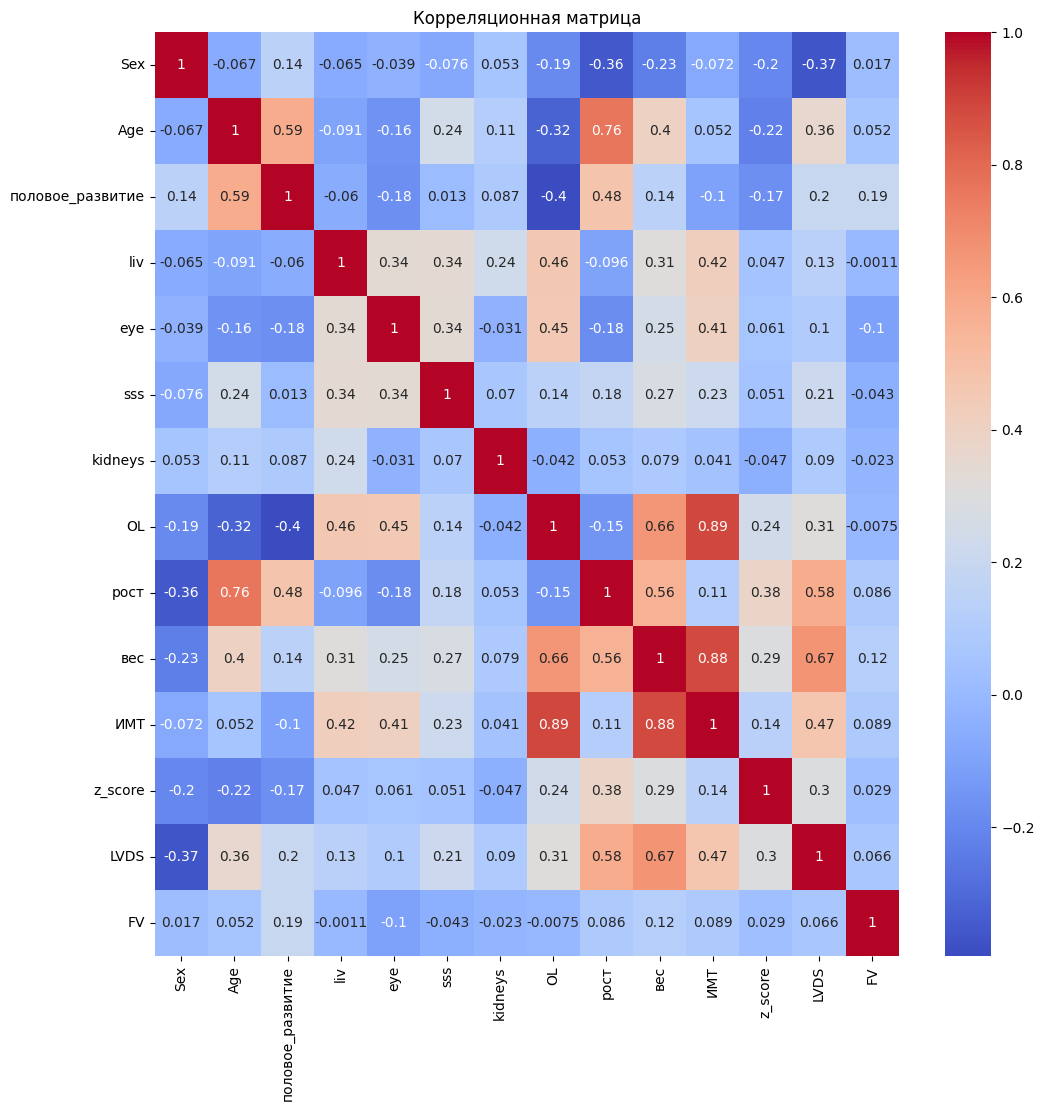

Наибольшая корреляция:  ИМТ  OL    0.88736
dtype: float64


In [63]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Корреляционная матрица')
plt.show()
max_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
# наибольшая корреляция между ИМТ и ОЛ
print('Наибольшая корреляция: ',max_corr[(max_corr != 1)].head(1))

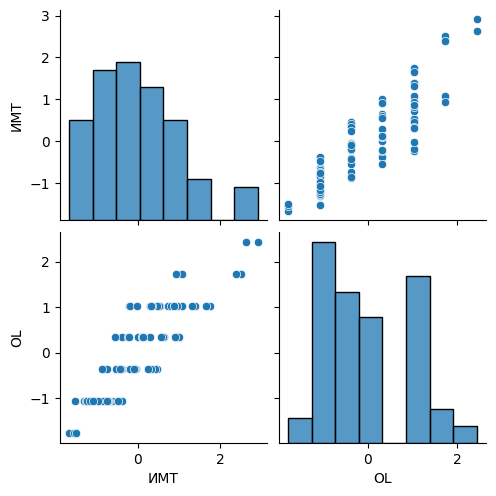

In [64]:
sns.pairplot(df[['ИМТ', 'OL']])

# Применяю множественную регрессию (к МТ детский)

In [65]:
y = df['z_score']
X = df[['Age', 'рост', 'вес', 'ИМТ', 'LVDS', 'FV']]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     46.45
Date:                Fri, 26 May 2023   Prob (F-statistic):           6.39e-24
Time:                        08:58:06   Log-Likelihood:                -57.086
No. Observations:                  86   AIC:                             128.2
Df Residuals:                      79   BIC:                             145.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.806e-17      0.053   1.48e-15      1.0

# Определяю значимость прогноза и наиболее значимые переменные

In [66]:
# Определяем зависимую переменную
y = df['z_score']

# Определяем независимые переменные
X = df[['Age', 'рост', 'вес', 'ИМТ', 'LVDS', 'FV']]

# Добавляем константу к независимым переменным
X = sm.add_constant(X)

# Создаем модель линейной регрессии
model = sm.OLS(y, X)

# Обучаем модель на данных
results = model.fit()

# Выводим результаты регрессии
print(results.summary())

# Определяем значимость прогноза
print('R-квадрат:', results.rsquared)
print('Скорректированный R-квадрат:', results.rsquared_adj)

# Определяем наиболее значимые переменные по t-статистике и p-значению
print('Наиболее значимые переменные:')
print(results.tvalues.drop('const').abs().sort_values(ascending=False)[:3])
print(results.pvalues.drop('const').sort_values()[:3])

                            OLS Regression Results                            
Dep. Variable:                z_score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     46.45
Date:                Fri, 26 May 2023   Prob (F-statistic):           6.39e-24
Time:                        08:58:10   Log-Likelihood:                -57.086
No. Observations:                  86   AIC:                             128.2
Df Residuals:                      79   BIC:                             145.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.806e-17      0.053   1.48e-15      1.0

# Факторный анализ. Проинтерпритировать главные компоненты, определить вклад первых двух в общую дисперсию


КОЛИЧЕСТВО объясненной дисперсии [0.27518448 0.20328929]


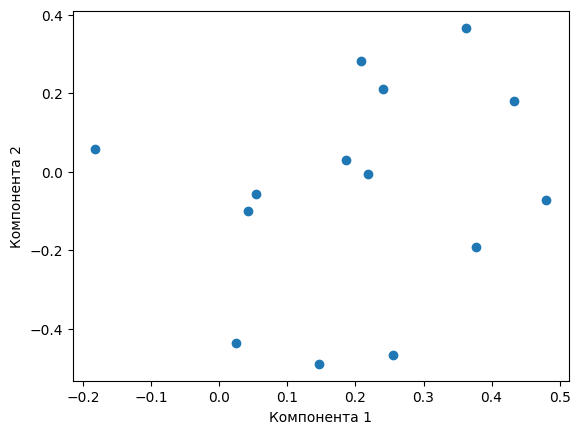

КОМПОНЕНТЫ         Sex       Age  половое_развитие       liv       eye       sss  \
0 -0.182243  0.146422          0.023760  0.241028  0.207856  0.217779   
1  0.057653 -0.489994         -0.437101  0.211494  0.282580 -0.006073   

    kidneys        OL      рост       вес       ИМТ   z_score      LVDS  \
0  0.053765  0.362954  0.254629  0.480336  0.433397  0.185718  0.376511   
1 -0.056849  0.366617 -0.467329 -0.071060  0.179923  0.030159 -0.191187   

         FV  
0  0.042294  
1 -0.099934  


In [67]:
# Определяем объект PCA
fa = PCA(n_components=2)

# Применяем PCA к данным
analysis = fa.fit_transform(df)

# Выводим количество объясненной дисперсии
print('КОЛИЧЕСТВО объясненной дисперсии', fa.explained_variance_ratio_)

# Строим график компонент
plt.scatter(fa.components_[0], fa.components_[1])
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
variables = df.columns
plt.show()

# Выводим компоненты
components = pd.DataFrame(fa.components_, columns=variables)
print('КОМПОНЕНТЫ', components)

In [68]:
# запишем значения главных компонент в таблицу с данными
df['c1'] = analysis[:,0]
df['c2'] = analysis[:,1]

In [69]:
# смотрим зависимость компоненты1 от признаков
model = smf.ols(formula='c1 ~ Age + рост + вес + ИМТ + LVDS + FV', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     c1   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     164.6
Date:                Fri, 26 May 2023   Prob (F-statistic):           1.62e-42
Time:                        08:58:20   Log-Likelihood:                -68.102
No. Observations:                  86   AIC:                             150.2
Df Residuals:                      79   BIC:                             167.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.633e-17      0.060   1.27e-15      1.0

Для компоненты 1 главная значимость: размер желудочка (LVDS) и возраст.

In [70]:
# смотрим зависимость компоненты 2 от признаков
model = smf.ols(formula='c2 ~ Age + рост + вес + ИМТ + LVDS + FV', data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     c2   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     139.5
Date:                Fri, 26 May 2023   Prob (F-statistic):           6.50e-40
Time:                        08:58:23   Log-Likelihood:                -61.638
No. Observations:                  86   AIC:                             137.3
Df Residuals:                      79   BIC:                             154.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.153e-17      0.056   1.46e-15      1.0

Для компоненты 2 главная значимость: выбросы (FV) и возраст.

# Вычисление дисперсии и значимости для компонент

In [71]:


# Вычисляем дисперсию для компонент
variance_c1 = df['c1'].var()
variance_c2 = df['c2'].var()

# Вычисляем общую дисперсию для всех переменных
variance_df = df.var()

# Выводим общую дисперсию
print('Общая дисперсия:')
print(variance_df)

# Суммируем дисперсии переменных
total_variance = variance_df.sum()

# Выводим суммарную дисперсию
print('Суммарная дисперсия:', total_variance)

# Вычисляем значимость дисперсии каждой компоненты
importancy_c1 = variance_c1 / total_variance
importancy_c2 = variance_c2 / total_variance

# Выводим значимость компонент
print('Значимость компоненты 1:', importancy_c1)
print('Значимость компоненты 2:', importancy_c2)

Общая дисперсия:
Sex                 1.011765
Age                 1.011765
половое_развитие    1.011765
liv                 1.011765
eye                 1.011765
sss                 1.011765
kidneys             1.011765
OL                  1.011765
рост                1.011765
вес                 1.011765
ИМТ                 1.011765
z_score             1.011765
LVDS                1.011765
FV                  1.011765
c1                  3.897907
c2                  2.879533
dtype: float64
Суммарная дисперсия: 20.94214617188561
Значимость компоненты 1: 0.18612740303713302
Значимость компоненты 2: 0.13749942269055862


# Вычисление дисперсии и значимости для компонент

# Дискриминантный анализ. Выполняем классификацию степени ожирения детей в зависимости от остальных переменных

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import numpy as np

target_float = target_int.astype(float)
# Преобразование целевой переменной в целочисленные метки
target_int = np.round(target_float).astype(int)

# Определение признаков
features = df.drop(columns=['OL'])

# Деление на данные для обучения и данные для проверки
train_features, test_features, train_target, test_target = train_test_split(features, target_int, test_size=0.15, random_state=42)

# Выполнение дискриминантного анализа с двумя компонентами
lda = LinearDiscriminantAnalysis(n_components=2)
model = lda.fit(train_features, train_target)
predicted_target = model.predict(test_features)

# Преобразование test_target в массив numpy
test_target = np.asarray(test_target)

# Вывод предсказанных и действительных значений
print('Предсказанные значения:', predicted_target)
print('Действительные значения:', test_target)

# Вычисление точности предсказания
correct_preds = np.sum(predicted_target == test_target)
precision = correct_preds / len(test_target)
print('Точность предсказания:', precision)

Предсказанные значения: [ 1  1  1  0  1 -2  0  1  0  0  1  0  1]
Действительные значения: [ 1  2  1  0  1 -2  0  1  0  0  2  0  1]
Точность предсказания: 0.8461538461538461


 Не смотря на маленький объем выборки, дискриминантный анализ показал хороший результат предсказаний.